# Load my libraries

In [1]:
import danial.vgg as vgg
import danial.dataloader as dataloader

# test?

In [2]:
test = dataloader.load_image("assets/RR.png")

print(test.shape)
vgg = vgg.backbone()
vgg.eval()
features = vgg(test, return_all=True)
for name, feat in features.items():
    print(f"{name}: {feat.shape}")

torch.Size([1, 3, 224, 224])


/Users/dania/code/fyp/MHNet/vengeance/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dania/code/fyp/MHNet/vengeance/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


block1: torch.Size([1, 64, 112, 112])
block2: torch.Size([1, 128, 56, 56])
block3: torch.Size([1, 256, 28, 28])
block4: torch.Size([1, 512, 14, 14])
block5: torch.Size([1, 512, 7, 7])


visualise the feature map

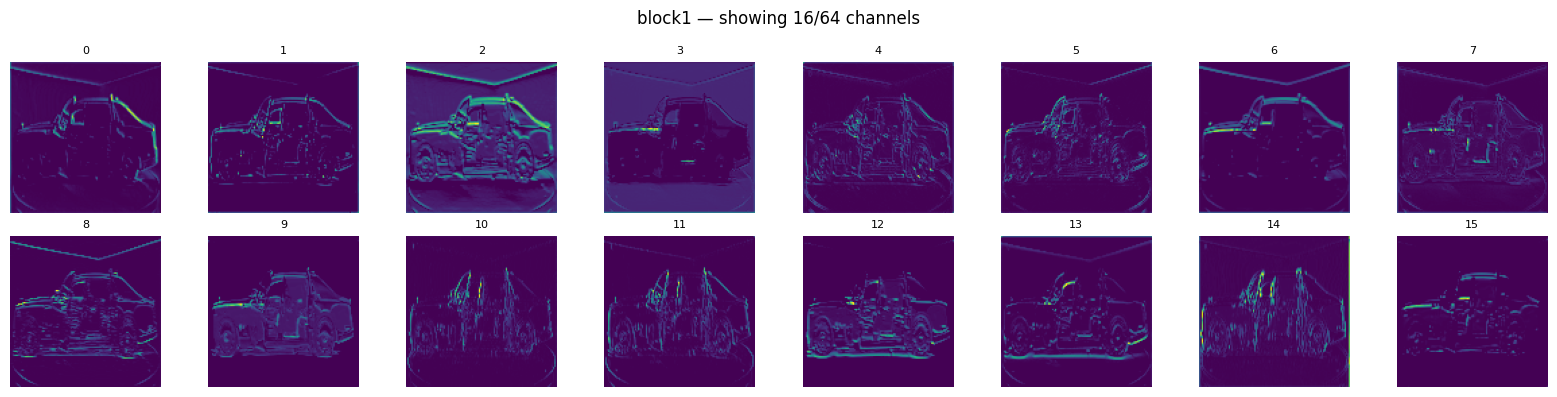

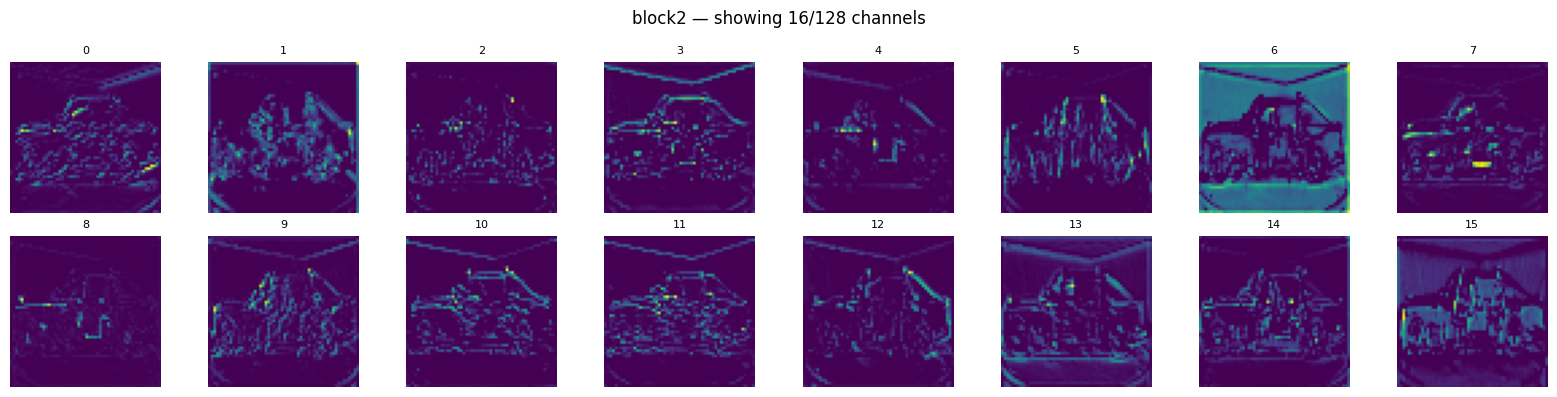

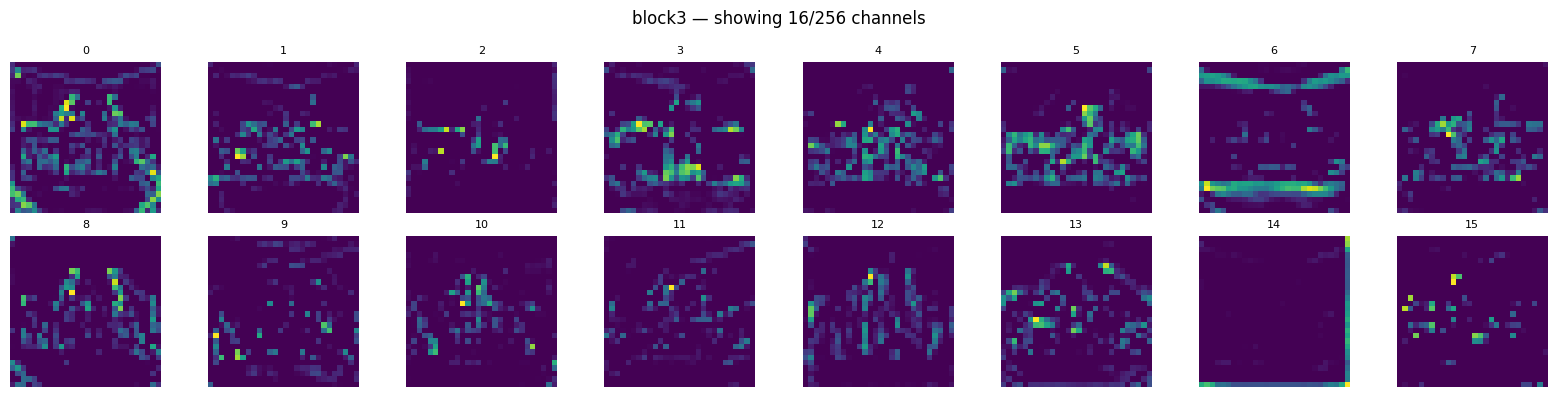

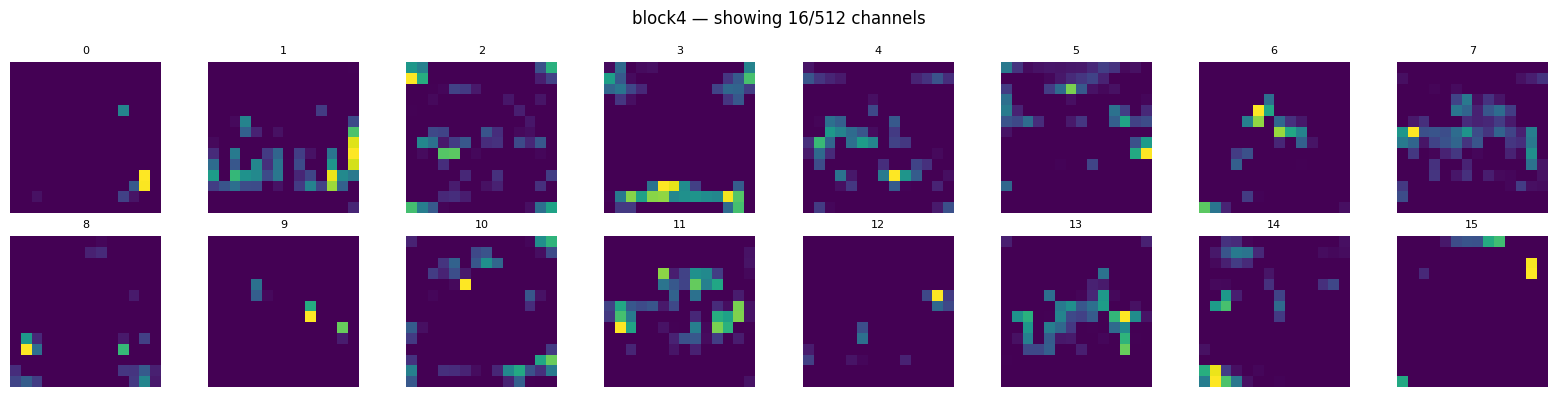

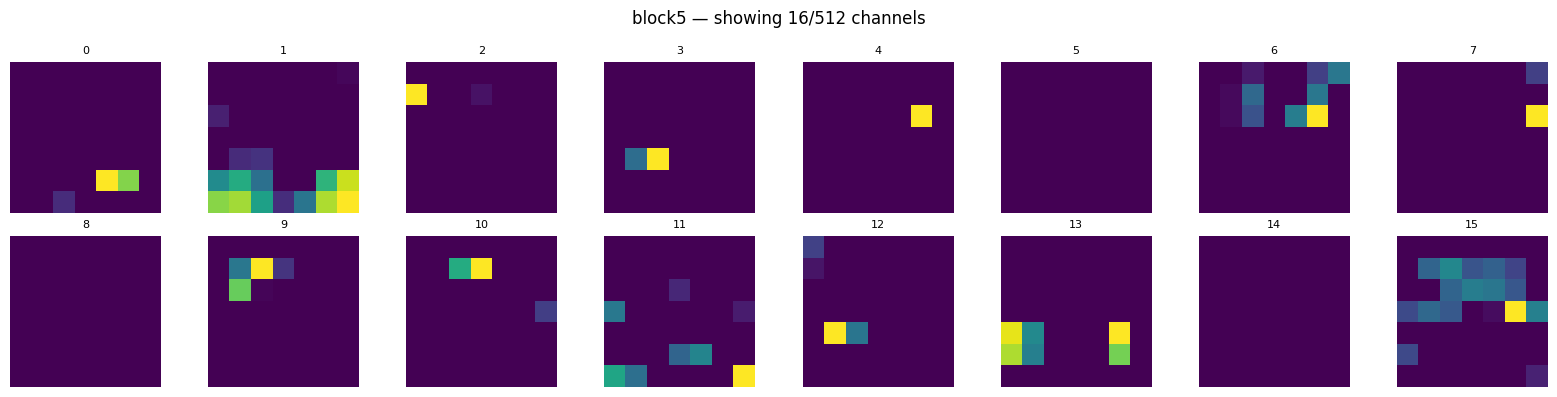

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Visualize feature maps stored in the `features` dict
# Expected shapes: (B, C, H, W) or (C, H, W) or (H, W)

for layer_name, feat in features.items():
    # Convert torch tensors to numpy arrays
    if isinstance(feat, torch.Tensor):
        arr = feat.detach().cpu().numpy()
    else:
        arr = np.array(feat)

    # Normalize shapes to (C, H, W)
    if arr.ndim == 4:
        # (B, C, H, W) -> take first batch
        arr = arr[0]
    if arr.ndim == 3:
        C, H, W = arr.shape
    elif arr.ndim == 2:
        # single channel HxW -> make channel dim
        H, W = arr.shape
        C = 1
        arr = arr.reshape(1, H, W)
    else:
        print(f"Skipping {layer_name}: unsupported shape {arr.shape}")
        continue

    # Display a limited number of channels to keep plots readable
    max_ch = 16
    n_ch = min(C, max_ch)
    cols = min(8, n_ch)
    rows = int(np.ceil(n_ch / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
    axes = np.array(axes).reshape(-1)
    fig.suptitle(f"{layer_name} — showing {n_ch}/{C} channels")
    for i in range(n_ch):
        im = arr[i]
        # normalize per-channel for better contrast
        im = im - im.min()
        if im.max() > 0:
            im = im / im.max()
        axes[i].imshow(im, cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(str(i), fontsize=8)
    # hide any leftover axes
    for j in range(n_ch, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()